In [153]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
# import the necessary libraries

import numpy as np
import pandas as pd
import os

from fastai.text import *
from pathlib import Path

In [155]:
# print the paths of all the files in the directory

for dirname, _, filenames in os.walk('/content/drive/My Drive/Colab Notebooks/Fake News Detection'):
    for name in filenames:
        print(os.path.join(dirname, name))

/content/drive/My Drive/Colab Notebooks/Fake News Detection/Fake.csv
/content/drive/My Drive/Colab Notebooks/Fake News Detection/export.pkl
/content/drive/My Drive/Colab Notebooks/Fake News Detection/original.csv
/content/drive/My Drive/Colab Notebooks/Fake News Detection/Fake News Detector.ipynb
/content/drive/My Drive/Colab Notebooks/Fake News Detection/True.csv
/content/drive/My Drive/Colab Notebooks/Fake News Detection/models/stage-1.pth
/content/drive/My Drive/Colab Notebooks/Fake News Detection/models/tmp.pth
/content/drive/My Drive/Colab Notebooks/Fake News Detection/models/stage-2.pth


In [156]:
path = Path("/content/drive/My Drive/Colab Notebooks/Fake News Detection")
path.ls()

[PosixPath('/content/drive/My Drive/Colab Notebooks/Fake News Detection/Fake.csv'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/Fake News Detection/models'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/Fake News Detection/export.pkl'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/Fake News Detection/.ipynb_checkpoints'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/Fake News Detection/original.csv'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/Fake News Detection/Fake News Detector.ipynb'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/Fake News Detection/True.csv')]

In [157]:
# extract the true data from the True.csv file
# extract the false data from the False.csv file

true_news_data = pd.read_csv(path/'True.csv', engine='python')
fake_news_data = pd.read_csv(path/'Fake.csv', engine='python')

In [158]:
# taking a look at the extracted true news data from the dataset

true_news_data

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",d of a conservative Republican faction in the ...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,d of a conservative Republican faction in the ...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,d of a conservative Republican faction in the ...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,d of a conservative Republican faction in the ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,d of a conservative Republican faction in the ...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,es on Tuesday welcomed President Donald Trump ...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"a provider of legal, regulatory and business i...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,"w of disused Soviet-era factories in Minsk, a ...",worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,retary of State Cardinal Pietro Parolin said o...,worldnews,"August 22, 2017"


In [159]:
# taking a look at the extracted fake news data from the dataset

fake_news_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [160]:
# printing the size of the data in true and fake news and fidning the total number of labels in the dataset

print("Total entries in the True News Dataset and the number of labels: ", true_news_data.shape)
print("Total entries in the False News Dataset and the number of labels: ", fake_news_data.shape)

Total entries in the True News Dataset and the number of labels:  (21417, 4)
Total entries in the False News Dataset and the number of labels:  (23481, 4)


In [161]:
# Drop all the rows that contain NaN values form both the true and false news dataset

true_news_data = true_data.dropna()
fake_news_data = fake_data.dropna()

In [162]:
# printing the size of the data in true and fake news after removing the rows with NaN values

print("Total entries in the True News Dataset and the number of labels: ", true_news_data.shape)
print("Total entries in the False News Dataset and the number of labels: ", fake_news_data.shape)

Total entries in the True News Dataset and the number of labels:  (21416, 4)
Total entries in the False News Dataset and the number of labels:  (23481, 4)


In [163]:
# add another coloumn named: fake to each dataset to mark the news as either True or False
# 0 ~ represents a True News
# 1 ~ represents a False News

true_news_data = true_news_data.assign(fake=0)
fake_news_data = fake_news_data.assign(fake=1)

In [164]:
# print the first 5 entries from true news dataset to see the newly assigned labels for each type of news
true_news_data.head()

,title,text,subject,date,fake
0,"As U.S. budget fight looms, Republicans flip t...",d of a conservative Republican faction in the ...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,d of a conservative Republican faction in the ...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,d of a conservative Republican faction in the ...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,d of a conservative Republican faction in the ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,d of a conservative Republican faction in the ...,politicsNews,"December 29, 2017",0


In [166]:
fake_news_data.head()

,title,text,subject,date,fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [168]:
# merge both the datasets of true and fake news into one large datset for classification

dataset = true_news_data.append(fake_news_data)

In [169]:
dataset.head()

,title,text,subject,date,fake
0,"As U.S. budget fight looms, Republicans flip t...",d of a conservative Republican faction in the ...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,d of a conservative Republican faction in the ...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,d of a conservative Republican faction in the ...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,d of a conservative Republican faction in the ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,d of a conservative Republican faction in the ...,politicsNews,"December 29, 2017",0


In [171]:
# the shape will show that now we have 5 columns (including the newly added fake column)
dataset.shape

(44897, 5)

In [175]:
# split the dataset into training and validation sets
# we assigned 20% of the data to Validation Set randomly 
# we will be classifying the news bsed on the text of the news, so we will use the text column in the dataset for cl
# classification purposes

data = (TextList.from_df(df=dataset, path=path, cols=1).split_by_rand_pct(0.2).label_from_df(cols=4).databunch())

In [176]:
# show a bunch of the data that we will use for classification

data.show_batch()

text,target
"xxbos xxmaj funny how secrets travel . i d start to believe , if i were to bleed . xxmaj lyrics written by xxmaj david xxmaj bowie from the album xxunk xxmaj helton 21st xxmaj century xxmaj wire xxmaj in the days before the xxup us presidential election in xxmaj november 2016 , xxmaj wikileaks revealed a new string of emails connected to xxmaj hillary xxmaj clinton s 2016 campaign",1
"xxbos xxmaj with mainstream media and establishment politicians stacked against him from the moment he announced his run for the presidency , xxmaj donald xxup j. xxmaj trump has been in an ongoing pitched battle to communicate his plans and his eventual successes to xxmaj americans . xxmaj through public rallies and social media , he has managed to bypass the traditional information gatekeepers and has spoken directly to the",1
xxbos xxunk text of former xxup fbi xxmaj director xxmaj james xxmaj comey ’s testimony as prepared for delivery to the xxup u.s. xxmaj senate xxmaj intelligence xxmaj committee . xxmaj comey is scheduled to testify at 10 a.m. ( 1400 xxup gmt ) on xxmaj thursday as part of the committee ’s investigation into xxup u.s. intelligence agency allegations that xxmaj russia tried to interfere with the 2016 presidential,0
"xxbos i just happened to be listening to xxmaj rush today and want to pass this on to everyone . xxmaj please share this and stop the false story being reported to try and bring down xxmaj trump . xxmaj it s bad enough that the lefty media is trying to take down xxmaj trump with big lies , but now it s the establishment xxmaj republicans like xxmaj kasich",1
xxbos xxmaj this is a story about how once trusted mainstream media outlets like xxmaj washington xxmaj post and the xxmaj new xxmaj york xxmaj times have used their vast platforms to distort reality and spread disinformation en masse to both the xxmaj american and global public . xxmaj it s also a story about a new excuse industry which has sprung up to xxunk xxmaj hillary xxmaj clinton s,1


In [177]:
# Create a Learner with a text classifier from data and showing the error_rate accordingly

learn = text_classifier_learner(data, AWD_LSTM, drop_mult=0.5, metrics=error_rate)

In [178]:
# we recieved an extremely good accuracy with just 1 epoch so we left it as it is

learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.528527,0.572919,0.336786,04:57


In [179]:
# save the model uptill now
learn.save('stage-1')

In [180]:
# Unfreeze entire model. All weights from frozen layers of the model now can get updated from their pre-trained state

learn.unfreeze()

In [181]:
# running the learning rate finder for the current model to find the optimal learning rate

learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


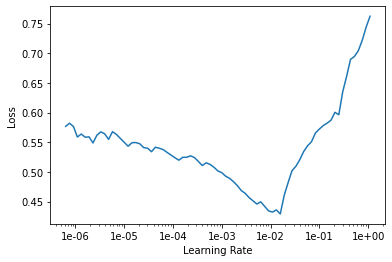

In [182]:
# plot the learning rate graph and look for the strongest downward curve and then select a slice of the range
# as the learning rate

learn.recorder.plot()

In [183]:
# once identifying the ideal learning rate, fit the model once again with the new learnign rate
# running 2 epochs this time

learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.110029,0.247776,0.083862,11:10
1,0.069312,0.021824,0.004900,09:23


In [184]:
# save the current model uptill now
learn.save('stage-2')

## Interpret the Model using a Confusion Matrix

In [185]:
# load the current model uptill now
learn.load('stage-2')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (35918 items)
x: TextList
xxbos d of a conservative xxmaj republican faction in the xxup u.s. xxmaj congress , who voted this month for a huge expansion of the national debt to pay for tax cuts , called himself a “ fiscal conservative ” on xxmaj sunday and urged budget restraint in 2018 . xxmaj in keeping with a sharp pivot under way among xxmaj republicans , xxup u.s. xxmaj representative xxmaj mark xxmaj meadows , speaking on xxup cbs ’ “ xxmaj face the xxmaj nation , ” drew a hard line on federal spending , which lawmakers are bracing to do battle over in xxmaj january . xxmaj when they return from the holidays on xxmaj wednesday , lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues , such as immigration policy , even as the xxmaj november congressional election campaigns approach in which xxmaj republicans will seek to keep control of xxmaj congress . xxmaj president xxmaj donald xx

In [186]:
interp = ClassificationInterpretation.from_learner(learn)

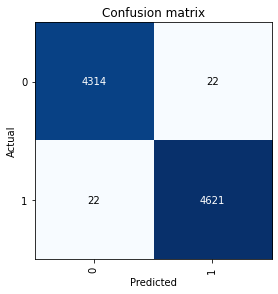

In [187]:
# build a confusion matrix to see the predicted results on the validation set
interp.plot_confusion_matrix()

## Putting the model in production

In [188]:
learn.export()

In [193]:
# learn = load_learner(path)

In [195]:
# we predict the image label 
# input = "Professor Zimdars' original list and criteria, with updates and addenda."
# pred_class,pred_idx,outputs = learn.predict(input)
# print("Predicted Label for the given image: ", pred_class.obj) # print the predicted label